In [1]:
import pandas as pd
import numpy as np

In [2]:
wine_old= pd.read_csv("winemag-data-130k-v2.csv", index_col = False)
wine_old.columns

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'taster_name',
       'taster_twitter_handle', 'title', 'variety', 'winery'],
      dtype='object')

In [3]:
wine = wine_old[wine_old.columns.difference(["Unnamed: 0", "region_2", "winery", "taster_twitter_handle", "designation"])]
wine.head()
#Description, points, year (from the title), vierity, location(country, province, region) price

,country,description,points,price,province,region_1,taster_name,title,variety
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,NaN,Sicily & Sardinia,Etna,Kerin O’Keefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Douro,NaN,Roger Voss,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,Willamette Valley,Paul Gregutt,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Michigan,Lake Michigan Shore,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Oregon,Willamette Valley,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir


In [4]:
# Check for nulls - country and province are same (assumed) 
wine.isnull().sum()

country           63
description        0
points             0
price           8996
province          63
region_1       21247
taster_name    26244
title              0
variety            1
dtype: int64

In [5]:
# Drop NA for some 
wine = wine.dropna(subset = ["country", "variety", "price"])
wine.isnull().sum()

country            0
description        0
points             0
price              0
province           0
region_1       19515
taster_name    24495
title              0
variety            0
dtype: int64

In [6]:
wine.shape

(120915, 9)

In [7]:
# Set to 'None' for some NA 
wine = wine.replace(np.nan, 'None', regex=True)

In [8]:
wine.isnull().sum()

country        0
description    0
points         0
price          0
province       0
region_1       0
taster_name    0
title          0
variety        0
dtype: int64

In [9]:
# Check to see negative values 
wine.describe()

,points,price
count,120915.000000,120915.000000
mean,88.421726,35.368796
std,3.044954,41.031188
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,42.000000
max,100.000000,3300.000000


In [10]:
wine.corr().round(2)

,points,price
points,1.00,0.42
price,0.42,1.00


In [11]:
import matplotlib.pyplot as plt

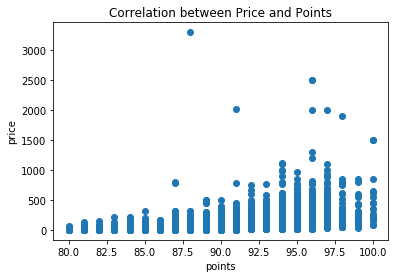

In [12]:
# Price and points plot to include in report potentially 
plt.scatter(wine['points'], wine['price'])
plt.title("Correlation between Price and Points")
plt.ylabel("price")
plt.xlabel("points")
plt.show()

In [13]:
wine.head()

,country,description,points,price,province,region_1,taster_name,title,variety
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Douro,None,Roger Voss,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,Willamette Valley,Paul Gregutt,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Michigan,Lake Michigan Shore,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Oregon,Willamette Valley,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir
5,Spain,Blackberry and raspberry aromas show a typical...,87,15.0,Northern Spain,Navarra,Michael Schachner,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot


In [14]:
# Created a new location as a concatenation of 3 features 
cols = ["country", "province", "region_1"]
wine["location"] = wine[cols].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)

In [15]:
wine.head()

,country,description,points,price,province,region_1,taster_name,title,variety,location
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Douro,None,Roger Voss,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Portugal_Douro_None
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,Willamette Valley,Paul Gregutt,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,US_Oregon_Willamette Valley
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Michigan,Lake Michigan Shore,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,US_Michigan_Lake Michigan Shore
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Oregon,Willamette Valley,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,US_Oregon_Willamette Valley
5,Spain,Blackberry and raspberry aromas show a typical...,87,15.0,Northern Spain,Navarra,Michael Schachner,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Spain_Northern Spain_Navarra


In [16]:
#get the year:
wineCopy= wine['title'].str.extract(r'([1-2][0-9]{3}.*[1-2][0-9]{3} |[1-2][0-9]{3})', expand=False)

In [17]:
def is_number(n):
    is_number = True
    try:
        num = float(n)
        # check for "nan" floats
        is_number = num == num   # or use `math.isnan(num)`
    except ValueError:
        is_number = False
    return is_number
def getYears(val):
    res = [int(i) for i in val.split() if i.isdigit()]
    return res
def condMax(years):
    max = -100
    for year in years:
        if year > max and year <2020:
            max = year
    return max
def extractYear(year):
    out = list()
    for val in year:
        if len(str(val)) > 4:
            years = getYears(val)
            out.append(condMax(years))
        else:
            out.append(val)
    return out


In [18]:
cleanYears = pd.Series(extractYear(wineCopy))


In [39]:
wine.insert(9,"year", cleanYears)


ValueError: cannot insert year, already exists

In [41]:
wine = wine.astype({"year": float})

In [42]:
wine.head()

,country,description,points,price,province,region_1,taster_name,title,variety,year,location,isGreat
1,Portugal,"This is ripe and fruity, a wine that is smooth while still structured. Firm tannins are filled out with juicy red berry fruits and freshened with acidity. It's already drinkable, although it will certainly be better from 2016.",87,15.0,Douro,None,Roger Voss,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,2013.0,Portugal_Douro_None,0
2,US,"Tart and snappy, the flavors of lime flesh and rind dominate. Some green pineapple pokes through, with crisp acidity underscoring the flavors. The wine was all stainless-steel fermented.",87,14.0,Oregon,Willamette Valley,Paul Gregutt,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,2013.0,US_Oregon_Willamette Valley,0
3,US,"Pineapple rind, lemon pith and orange blossom start off the aromas. The palate is a bit more opulent, with notes of honey-drizzled guava and mango giving way to a slightly astringent, semidry finish.",87,13.0,Michigan,Lake Michigan Shore,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling (Lake Michigan Shore),Riesling,2012.0,US_Michigan_Lake Michigan Shore,0
4,US,"Much like the regular bottling from 2012, this comes across as rather rough and tannic, with rustic, earthy, herbal characteristics. Nonetheless, if you think of it as a pleasantly unfussy country wine, it's a good companion to a hearty winter stew.",87,65.0,Oregon,Willamette Valley,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child Block Pinot Noir (Willamette Valley),Pinot Noir,2011.0,US_Oregon_Willamette Valley,0
5,Spain,"Blackberry and raspberry aromas show a typical Navarran whiff of green herbs and, in this case, horseradish. In the mouth, this is fairly full bodied, with tomatoey acidity. Spicy, herbal flavors complement dark plum fruit, while the finish is fresh but grabby.",87,15.0,Northern Spain,Navarra,Michael Schachner,Tandem 2011 Ars In Vitro Tempranillo-Merlot (Navarra),Tempranillo-Merlot,2013.0,Spain_Northern Spain_Navarra,0


In [21]:
pd.set_option('display.max_colwidth', 150000) #important for getting all the text
pd.set_option('display.max_columns', 999)
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
import math

In [22]:
wineStr = wine['description'].tolist()

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(use_idf=True, norm=None)

tf1_dm = tfidf.fit_transform(wineStr) 
pd.DataFrame(tf1_dm.toarray(), columns = tfidf.get_feature_names())

000  008   01   02   03  030  035   04  04s   05  056  05s   06  061  \
0       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
...     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
120910  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
120911  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
120912  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
120913  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
120914  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

        064  06s   07  07s   08  080  08s   09  093  09s   10  100  1000  \
0       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   
1       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   
2       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   
3       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   
4       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   
...     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   
120910  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   
120911  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   
120912  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   
120913  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   
120914  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   

        100g  100ml  100th  101  1016  103  104  105  106  107th  108  10g  \
0        0.0    0.0    0.0  0.0   0.0  0.0  0.0  0.0  0.0    0.0  0.0  0.0   
1        0.0    0.0    0.0  0.0   0.0  0.0  0.0  0.0  0.0    0.0  0.0  0.0   
2        0.0    0.0    0.0  0.0   0.0  0.0  0.0  0.0  0.0    0.0  0.0  0.0   
3        0.0    0.0    0.0  0.0   0.0  0.0  0.0  0.0  0.0    0.0  0.0  0.0   
4        0.0    0.0    0.0  0.0   0.0  0.0  0.0  0.0  0.0    0.0  0.0  0.0   
...      ...    ...    ...  ...   ...  ...  ...  ...  ...    ...  ...  ...   
120910   0.0    0.0    0.0  0.0   0.0  0.0  0.0  0.0  0.0    0.0  0.0  0.0   
120911   0.0    0.0    0.0  0.0   0.0  0.0  0.0  0.0  0.0    0.0  0.0  0.0   
120912   0.0    0.0    0.0  0.0   0.0  0.0  0.0  0.0  0.0    0.0  0.0  0.0   
120913   0.0    0.0    0.0  0.0   0.0  0.0  0.0  0.0  0.0    0.0  0.0  0.0   
120914   0.0    0.0    0.0  0.0   0.0  0.0  0.0  0.0  0.0    0.0  0.0  0.0   

        10th   11  110  111  112  114  115  116  1194  11th   12  120  1200  \
0        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0  0.0   0.0   
1        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0  0.0   0.0   
2        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0  0.0   0.0   
3        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0  0.0   0.0   
4        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0  0.0   0.0   
...      ...  ...  ...  ...  ...  ...  ...  ...   ...   ...  ...  ...   ...   
120910   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0  0.0   0.0   
120911   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0  0.0   0.0   
120912   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0  0.0   0.0   
120913   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0  0.0   0.0   
120914   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0  0.0   0.0   

        122  123  125  1252  126  128  1290  12g  12th   13  130  130th  132  \
0       0.0  0.0  0.0   0.0  0.0  0.0   0.0  0.0   0.0  0.0  0.0    0.0  0.0   
1       0.0  0.0  0.0   0.0  0.0  0.0   0.0  0.0   0.0  0.0  0.0    0.0  0.0   
2       

In [24]:
names = tfidf.get_feature_names()   #create list of feature names
print(type(names), len(names))
count = np.sum(tf1_dm.toarray(), axis = 0) # add up feature counts 
count2 = count.tolist()  # convert numpy array to list
count_df = pd.DataFrame(count2, index = names, columns = ['count']) # create a dataframe from the list

<class 'list'> 30250


In [25]:
count_df['count'].sort_values(ascending = False).head(20)

and        333841.742915
the        250404.622625
of         204927.473365
with       159617.978228
is         144336.635207
it         136016.929979
this       135684.883251
wine       124637.666327
in         117094.758436
to         106714.432601
flavors    105264.665772
on          97013.963551
fruit       96011.992568
that        85829.987899
aromas      81814.197309
palate      81361.208594
finish      76948.279181
from        76554.426124
acidity     74653.296523
but         74419.672298
Name: count, dtype: float64

In [27]:
from sklearn.feature_extraction import text 
skl_stopwords = list(text.ENGLISH_STOP_WORDS)
my_stopwords = skl_stopwords + ["and", "the", "of", "with", "is", "it", "this", "wine", "in", "to", "on", "that", "from", "but"]

stopmin = CountVectorizer(binary=False, lowercase = True, min_df = .12, stop_words = my_stopwords) 
stopmin_wine = stopmin.fit_transform(wineStr) 
print(stopmin_wine.shape)

(120915, 19)


In [28]:
# Counts of words after removing custom stop words 

names = stopmin.get_feature_names()   #create list of feature names
print(type(names), len(names))
count = np.sum(stopmin_wine .toarray(), axis = 0) # add up feature counts 
count2 = count.tolist()  # convert numpy array to list
count_df = pd.DataFrame(count2, index = names, columns = ['count']) # create a dataframe from the list

<class 'list'> 19


In [29]:
count_df['count'].sort_values(ascending = False).head(20)

flavors    60140
fruit      46262
aromas     37466
palate     36786
finish     33658
acidity    31528
tannins    28111
drink      27953
cherry     27830
black      27147
ripe       24594
red        20258
notes      18111
spice      17609
oak        17332
nose       16338
dry        16244
fresh      15859
rich       15818
Name: count, dtype: int64

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

ranges = [79, 91, 101]
labels = ["0", "1"]
wine['isGreat'] = pd.cut(wine.points, ranges, labels=labels).astype('category')

X = stopmin_wine.toarray()  
y = wine['isGreat'].values 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345) 

nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [31]:
#predictive accuracy
nb_pred = nb.predict(X_test)

print("Accuracy:", nb.score(X_test, y_test))
print(classification_report(y_test, nb_pred))

Accuracy: 0.8286813050490014
              precision    recall  f1-score   support

           0       0.83      1.00      0.91     20068
           1       0.39      0.01      0.02      4115

    accuracy                           0.83     24183
   macro avg       0.61      0.50      0.47     24183
weighted avg       0.76      0.83      0.76     24183



In [32]:
# Look at words versus correlation 

greatWine = wine.drop(wine[ wine['isGreat'] == "0"].index)

In [33]:
# Great words 
skl_stopwords = list(text.ENGLISH_STOP_WORDS)
my_stopwords = skl_stopwords + ["and", "the", "of", "with", "is", "it", "this", "wine", "in", "to", "on", "that", "from", "but"]

stopmin_great = CountVectorizer(binary=False, lowercase = True, min_df = .12, stop_words = my_stopwords) 
stopmin_wine_great = stopmin_great.fit_transform(greatWine['description'].tolist()) 

# Counts 
names = stopmin_great.get_feature_names()   #create list of feature names
print(type(names), len(names))
count = np.sum(stopmin_wine_great.toarray(), axis = 0) # add up feature counts 
count2 = count.tolist()  # convert numpy array to list
count_df = pd.DataFrame(count2, index = names, columns = ['count']) # create a dataframe from the list

count_df['count'].sort_values(ascending = False).head(15)

<class 'list'> 20


flavors    8899
fruit      8388
black      7234
palate     6754
drink      6638
tannins    6179
acidity    5483
cherry     5426
ripe       5244
aromas     5100
finish     4992
rich       4448
spice      3737
dark       3328
red        3204
Name: count, dtype: int64

In [34]:
# Good words 

goodWine = wine.drop(wine[wine['isGreat'] == "1"].index)

In [35]:
# Good words 
skl_stopwords = list(text.ENGLISH_STOP_WORDS)
my_stopwords = skl_stopwords + ["and", "the", "of", "with", "is", "it", "this", "wine", "in", "to", "on", "that", "from", "but"]

stopmin_good = CountVectorizer(binary=False, lowercase = True, min_df = .12, stop_words = my_stopwords) 
stopmin_wine_good = stopmin_good.fit_transform(goodWine['description'].tolist()) 

# Counts 
names = stopmin_good.get_feature_names()   #create list of feature names
print(type(names), len(names))
count = np.sum(stopmin_wine_good.toarray(), axis = 0) # add up feature counts 
count2 = count.tolist()  # convert numpy array to list
count_df = pd.DataFrame(count2, index = names, columns = ['count']) # create a dataframe from the list

count_df['count'].sort_values(ascending = False).head(15)

<class 'list'> 19


flavors    51241
fruit      37874
aromas     32366
palate     30032
finish     28666
acidity    26045
cherry     22404
tannins    21932
drink      21315
black      19913
ripe       19350
red        17054
notes      14934
oak        14278
dry        13875
Name: count, dtype: int64

In [43]:
# Years and points correlation - none 
wine.corr().round(2) 

,points,price,year
points,1.00,0.42,-0.01
price,0.42,1.00,0.00
year,-0.01,0.00,1.00


### Run Association Rules 

### Final Analysis 